## 25. Нелинейный метод наименьших квадратов
[Ланцош <<Прикладные методы анализа>>]

Данные, представленные в таблице, нанесите на график.
```
       x         f(x)    
 ----------------------
    2.5134       0    
    2.0443       0.05
    1.6684       0.10
    1.3664       0.15
    1.1232       0.20
    0.9269       0.25
    0.7679       0.30
    0.6389       0.35
    0.5338       0.40
    0.4479       0.45
    0.3776       0.50
    0.3197       0.55
    0.2720       0.60
    0.2325       0.65
    0.1997       0.70
    0.1723       0.75
    0.1493       0.80
    0.1301       0.85
    0.1138       0.90
    0.1000       0.95
    0.0883       1.00
    0.0783       1.05
    0.0698       1.10
    0.0624       1.15
```
Нелинейным методом наименьших квадратов аппроксимируйте данные моделью в виде суммы $3$ экспонент
$$
f(x) = \beta_1 e^{-\lambda_1 x} + \beta_2 e^{-\lambda_2 x} + \beta_3 e^{-\lambda_3 x},
$$
Рассмотрите различные начальные приближения к $\beta_1$, $\beta_2$, $\beta_3$, $\lambda_1$, $\lambda_2$,$\lambda_3$.
Чему равна результирующая суммарная ошибка?
Насколько чувствительны результирующие значения к начальным значениям?
Как изменится результат, если в модели оставить одну или две экспоненты?
Для одной экспоненты сведите задачу к линейной задаче наименьших квадратов.

##Решение

Нанесём представленные в таблице данные на график:

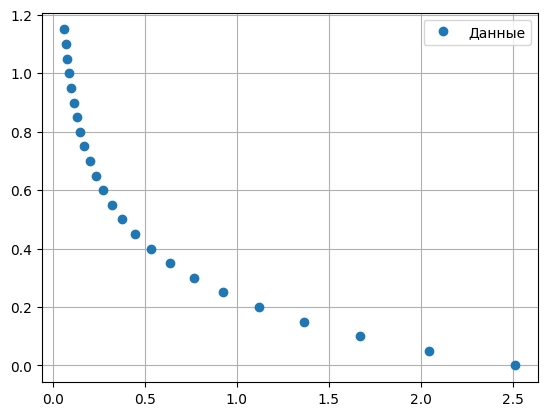

In [190]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([2.5134, 2.0443, 1.6684, 1.3664, 1.1232, 0.9269, 0.7679, 0.6389, 0.5338, 0.4479, 0.3776, 0.3197, 0.2720, 0.2325, 0.1997, 0.1723, 0.1493, 0.1301, 0.1138, 0.1000, 0.0883, 0.0783, 0.0698, 0.0624])
y = np.arange(0, 1.2, 0.05)

plt.plot(x, y, 'o', label = 'Данные')
plt.legend()
plt.grid()

Далее необходимо с помощью нелинейного метода наименьших квадратов аппроксимировать данные моделью в виде суммы 3 экспонент:
$$
f_3(x) = \beta_1 e^{-\lambda_1 x} + \beta_2 e^{-\lambda_2 x} + \beta_3 e^{-\lambda_3 x}
$$
Для начала реализуем эту модель в виде функции:

In [191]:
def f3(x, b1, b2, b3, L1, L2, L3):
  return b1*np.exp(-L1*x) + b2*np.exp(-L2*x) + b3*np.exp(-L3*x)

Далее с помощью функции curve_fit модуля optimize библиотеки scipy найдём оптимальные значения для коэффициентов $\beta_1$, $\beta_2$, $\beta_3$, $\lambda_1$, $\lambda_2$, $\lambda_3$ (начальные приближения не задаём):

In [192]:
from scipy import optimize

coefs3_1, _ = optimize.curve_fit(f3, x, y)
print('Коэффициенты:', *coefs3_1)

Коэффициенты: 0.40482399082776466 0.40394179658811413 0.872653115277959 1.2906265976177782 1.2906461509833782 12.701308973402334


Нанесём аппроксимирующую кривую на график:

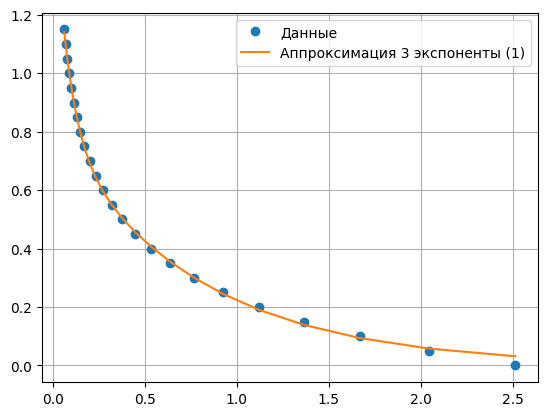

In [193]:
plt.plot(x, y, 'o', label = 'Данные')
plt.plot(x, f3(x, *coefs3_1), label = 'Аппроксимация 3 экспоненты (1)')
plt.legend()
plt.grid()

Найдём результирующую суммарную ошибку как сумму квадратов отклонений смоделированных значений от заданных:
$$
 \sum_{i=1}^n (y_i - f_3(x_i))^2
$$

In [194]:
error3_1 = 0
for i in range(24):
  error3_1 += (y[i] - f3(x[i], *coefs3_1))**2
print('Результирующая суммарная ошибка (3_1) =', error3_1)

Результирующая суммарная ошибка (3_1) = 0.001769731591403745


Получили результирующую суммарную ошибку для начальных приближений к $\beta_1$, $\beta_2$, $\beta_3$, $\lambda_1$, $\lambda_2$,$\lambda_3$, заданных по умолчанию (1, 1, 1, 1, 1, 1).

##Различные начальные приближения
Теперь попробуем задать в функцию curve_fit различные начальные приближения к $\beta_1$, $\beta_2$, $\beta_3$, $\lambda_1$, $\lambda_2$,$\lambda_3$, нанести аппроксимирующую кривую на график и найти результирующую ошибку.
Зададим значения (0, 0, 0, 0, 0, 0):

Коэффициенты: 17.119875019906203 -7.976872908407984 -7.97696383524003 2.0638902727230257 2.063923541617345 2.06391699710319


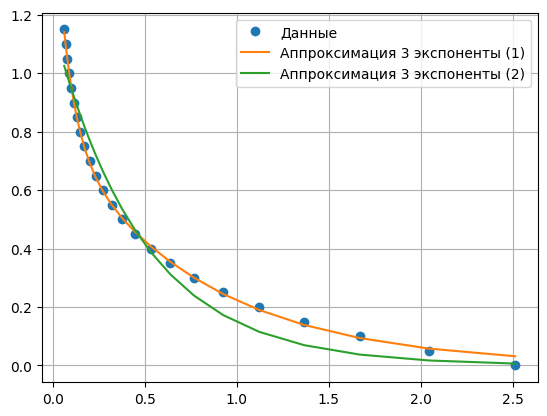

In [195]:
coefs3_2, _ = optimize.curve_fit(f3, x, y, np.array([0, 0, 0, 0, 0, 0]))
print('Коэффициенты:', *coefs3_2)

plt.plot(x, y, 'o', label = 'Данные')
plt.plot(x, f3(x, *coefs3_1), label = 'Аппроксимация 3 экспоненты (1)')
plt.plot(x, f3(x, *coefs3_2), label = 'Аппроксимация 3 экспоненты (2)')
plt.legend()
plt.grid()

In [196]:
error3_2 = 0
for i in range(24):
  error3_2 += (y[i] - f3(x[i], *coefs3_2))**2
print('Результирующая суммарная ошибка (3_1) =', error3_1)
print('Результирующая суммарная ошибка (3_2) =', error3_2)
print('Точность уменьшилась в', error3_2 / error3_1, 'раз')

Результирующая суммарная ошибка (3_1) = 0.001769731591403745
Результирующая суммарная ошибка (3_2) = 0.0867810344246755
Точность уменьшилась в 49.03626902870682 раз


Как видим по графику и по значению суммарной ошибки, точность аппроксимации с начальными значениями коэффициентов (0, 0, 0, 0, 0, 0) уменьшилась довольно значительно.

Попробуем задать начальные приближения (1.25, 1.25, 1.25, 1.25, 1.25, 1.25):

Коэффициенты: -1.2301021497825373e-05 0.7878214529115495 0.8688212943255545 -3.1657356517595936 1.2430845915069577 12.01372155593893


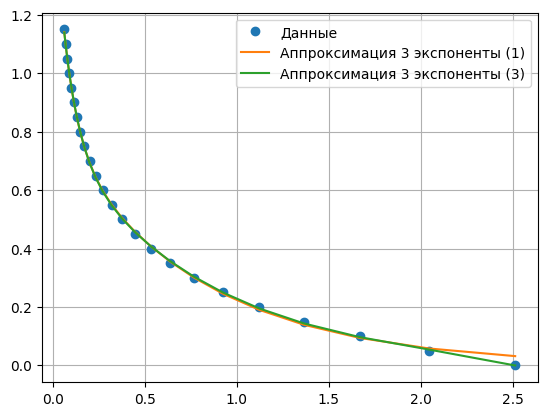

In [197]:
coefs3_3, _ = optimize.curve_fit(f3, x, y, np.array([1.25, 1.25, 1.25, 1.25, 1.25, 1.25]))
print('Коэффициенты:', *coefs3_3)

plt.plot(x, y, 'o', label = 'Данные')
plt.plot(x, f3(x, *coefs3_1), label = 'Аппроксимация 3 экспоненты (1)')
plt.plot(x, f3(x, *coefs3_3), label = 'Аппроксимация 3 экспоненты (3)')
plt.legend()
plt.grid()

In [198]:
error3_3 = 0
for i in range(24):
  error3_3 += (y[i] - f3(x[i], *coefs3_3))**2
print('Результирующая суммарная ошибка (3_1) =', error3_1)
print('Результирующая суммарная ошибка (3_3) =', error3_3)
print('Точность увеличилась в', error3_1 / error3_3, 'раз')

Результирующая суммарная ошибка (3_1) = 0.001769731591403745
Результирующая суммарная ошибка (3_3) = 0.0006347158379711957
Точность увеличилась в 2.7882266134409237 раз


Наблюдаем незначительное увеличение точности (в основном на значении x = 2.5134)

Попробуем взять коэффициенты, подобранные функцией curve_fit с начальными значениями по умолчанию, и изменить их (вычитаем 10):

Коэффициенты: -0.005243017217565672 0.005243021114595766 1.1675440444209386 -8.693221080129758 -8.693220784246645 2.0719016904401664


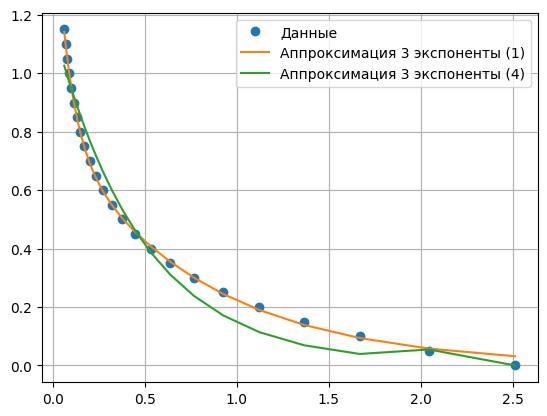

In [199]:
coefs3_4, _ = optimize.curve_fit(f3, x, y, coefs3_1 - 10)
print('Коэффициенты:', *coefs3_4)

plt.plot(x, y, 'o', label = 'Данные')
plt.plot(x, f3(x, *coefs3_1), label = 'Аппроксимация 3 экспоненты (1)')
plt.plot(x, f3(x, *coefs3_4), label = 'Аппроксимация 3 экспоненты (4)')
plt.legend()
plt.grid()

In [200]:
error3_4 = 0
for i in range(24):
  error3_4 += (y[i] - f3(x[i], *coefs3_4))**2
print('Результирующая суммарная ошибка (3_1) =', error3_1)
print('Результирующая суммарная ошибка (3_4) =', error3_4)
print('Точность уменьшилась в', error3_4 / error3_1, 'раз')

Результирующая суммарная ошибка (3_1) = 0.001769731591403745
Результирующая суммарная ошибка (3_4) = 0.0853065502610113
Точность уменьшилась в 48.20310078397055 раз


Опять наблюдаем значительное уменьшение точности.

Можно утверждать, что при изменении начальных приближений к коэффициентам $\beta_1$, $\beta_2$, $\beta_3$, $\lambda_1$, $\lambda_2$, $\lambda_3$ точность аппроксимации может заметно измениться (как в лучшую, так и в худшую сторону).

##Модель из двух экспонент
Далее попробуем оставить в модели две экспоненты с соответствующими коэффициентами. То есть будем аппроксимировать данные нелинейным методом наименьших квадратов с помощью следующей модели:
$$
f_2(x) = \beta_1 e^{-\lambda_1 x} + \beta_2 e^{-\lambda_2 x}
$$
Реализуем модель в виде функции:

In [201]:
def f2(x, b1, b2, L1, L2):
  return b1*np.exp(-L1*x) + b2*np.exp(-L2*x)

Далее с помощью curve_fit подберём коэффициенты и изобразим аппроксимирующую прямую на графике:

<ipython-input-201-2f1ceb0f7cb6>:2: RuntimeWarning: overflow encountered in exp
  return b1*np.exp(-L1*x) + b2*np.exp(-L2*x)


Коэффициенты: 0.8087726877182584 0.8726649666533404 1.2906471353021212 12.701697373868091


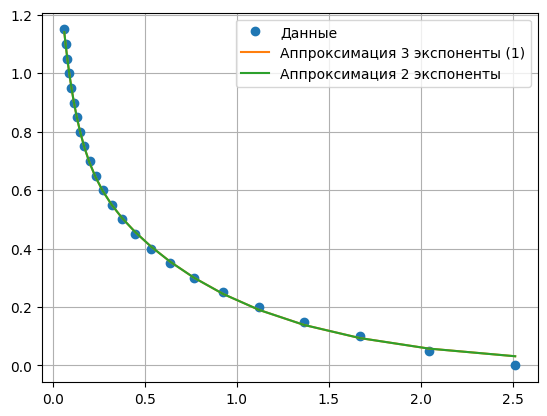

In [202]:
coefs2, _ = optimize.curve_fit(f2, x, y)
print('Коэффициенты:', *coefs2)

plt.plot(x, y, 'o', label = 'Данные')
plt.plot(x, f3(x, *coefs3_1), label = 'Аппроксимация 3 экспоненты (1)')
plt.plot(x, f2(x, *coefs2), label = 'Аппроксимация 2 экспоненты')
plt.legend()
plt.grid()

Найдём результирующую суммарную ошибку для данной модели и сравним её с ошибкой модели из трёх экспонент:

In [203]:
error2 = 0
for i in range(24):
  error2 += (y[i] - f2(x[i], *coefs2))**2
print('Результирующая суммарная ошибка (3_1) =', error3_1)
print('Результирующая суммарная ошибка (2) =', error2)

Результирующая суммарная ошибка (3_1) = 0.001769731591403745
Результирующая суммарная ошибка (2) = 0.0017697315713156173


Видим, что при удалении из формулы-модели одной экспоненты точность аппроксимации практически не изменилась.

##Модель из одной экспоненты
Попробуем оставить в модели одну экспоненту:
$$
f_1(x) = \beta_1 e^{-\lambda_1 x}
$$

Функция-модель:

In [204]:
def f1(x, b1, L1):
  return b1*np.exp(-L1*x)

Для начала подберём коэффициенты нелинейным методом наименьших квадратов с помощью curve_fit:

Коэффициенты: 1.1660130759936063 2.0633459891446506


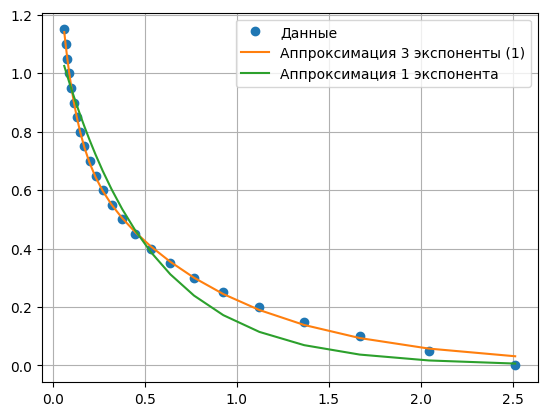

In [207]:
coefs1, _ = optimize.curve_fit(f1, x, y)
print('Коэффициенты:', *coefs1)

plt.plot(x, y, 'o', label = 'Данные')
plt.plot(x, f3(x, *coefs3_1), label = 'Аппроксимация 3 экспоненты (1)')
plt.plot(x, f1(x, *coefs1), label = 'Аппроксимация 1 экспонента')
plt.legend()
plt.grid()

Найдём результирующую суммарную ошибку для данной модели и сравним её с ошибкой модели из трёх экспонент:

In [208]:
error1 = 0
for i in range(24):
  error1 += (y[i] - f1(x[i], *coefs1))**2
print('Результирующая суммарная ошибка (3_1) =', error3_1)
print('Результирующая суммарная ошибка (1) =', error1)
print('Точность уменьшилась в', error1 / error3_1, 'раз')

Результирующая суммарная ошибка (3_1) = 0.001769731591403745
Результирующая суммарная ошибка (1) = 0.086781024973023
Точность уменьшилась в 49.03626368798027 раз


Видим значительное уменьшение точности данной модели (напоминает случай, когда для модели из трёх экспонент задали неоптимальные начальные приближения к коэффициентам $\beta_1$, $\beta_2$, $\beta_3$, $\lambda_1$, $\lambda_2$, $\lambda_3$).

##Линейный метод
Несмотря на то, что в формулу $f_1(x) = \beta_1 e^{-\lambda_1 x}$ из одной экспоненты коэффициент $\lambda_1$ входит нелинейно, с помощью логарифмирования можно свести задачу поиска коэффициентов к поиску линейным методом наименьших квадратов:
$$
\ln f_1 = \ln \beta_1 - \lambda_1 x
$$
Введём обозначения:
$$
f_1' = \ln f_1
$$
$$
\beta_1' = \ln \beta_1
$$
Получаем формулу в виде многочлена 1 степени:
$$
f_1' = \beta_1' + (-\lambda_1)x
$$
Теперь коэффициенты $\beta_1'$, $\lambda_1$ входят линейно. Найдём их методом наименьших квадратов с помощью функции polyfit из библиотеки numpy (точку (2.5134, 0) не берём, т.к. от 0 нельзя взять логарифм):

In [209]:
L1_Lin, b1_Lin = np.polyfit(x[1:], np.log(y[1:]), 1)

Не забываем, что $\lambda_1$ нужно взять со знаком минус и что $\beta_1' = \ln \beta_1$:

In [210]:
L1_Lin = -L1_Lin
b1_Lin = np.exp(b1_Lin)
print(b1_Lin, L1_Lin)

1.0071668417059718 1.4692149794854636


Теперь можем нанести аппроксимирующую кривую на график:

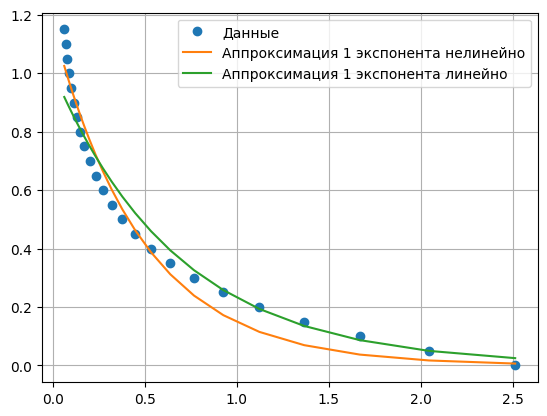

In [211]:
plt.plot(x, y, 'o', label = 'Данные')
plt.plot(x, f1(x, *coefs1), label = 'Аппроксимация 1 экспонента нелинейно')
plt.plot(x, f1(x, b1_Lin, L1_Lin), label = 'Аппроксимация 1 экспонента линейно')
plt.legend()
plt.grid()

Найдём результирующую ошибку и сравним её с ошибкой аппроксимации той же моделью из одной экспоненты нелинейным методом:

In [212]:
error1_Lin = 0
for i in range(24):
  error1_Lin += (y[i] - f1(x[i], b1_Lin, L1_Lin))**2
print('Результирующая суммарная ошибка (1) =', error1)
print('Результирующая суммарная ошибка (1_Lin) =', error1_Lin)
print('Точность уменьшилась в', error1_Lin / error1, 'раз')

Результирующая суммарная ошибка (1) = 0.086781024973023
Результирующая суммарная ошибка (1_Lin) = 0.17407192405815392
Точность уменьшилась в 2.005875410117205 раз


Нелинейный метод наименьших квадратов оказался точнее линейного в 2 раза.

##Выводы:
1) Удалось достаточно точно аппроксимировать данные моделью в виде суммы 3 экспонент $f(x) = \beta_1 e^{-\lambda_1 x} + \beta_2 e^{-\lambda_2 x} + \beta_3 e^{-\lambda_3 x}$ (результирующая суммарная ошибка составила 0.001769731591403745)

2) При изменении начальных приближений к коэффициентам $\beta_1$, $\beta_2$, $\beta_3$, $\lambda_1$, $\lambda_2$, $\lambda_3$ точность аппроксимации может заметно измениться (как в лучшую, так и в худшую сторону).

3) При удалении из формулы-модели одной экспоненты точность аппроксимации практически не изменилась.

4) При удалении двух экспонент из формулы-модели значительно теряется точность аппроксимации.

5) Удалось с помощью логарифмирования формулы из одной экспоненты $f_1(x) = \beta_1 e^{-\lambda_1 x}$ свести задачу поиска оптимальных коэффициентов к линейному методу наименьших квадратов, при этом точность аппроксимации по сравнению с нелинейным методом для этой же формулы ухудшилась в 2 раза).